In [2]:
Introduction

Sabermetrics is the empirical analysis of baseball, primarily focusing on baseball statistics that measure in game activity. 
Sabermetrics was not highly regarded by Major League Baseball teams until 2002, when the Oakland A's used advanced analytics to 
build a roster that could compete with big market teams, despite having a payroll half the size. 
By diving into the use of sabermetrics, I wanted to understand what variables teams should value most in builidng a successful
roster. Ideally, I would apply this research as an example of player development and general management of a franchise. 

Specifically, I wanted to focus on three questions: 
    1)What do successful teams do better than their competitors?
    2)How important is the home run compared to historical data?
    3)How important is payroll in building sustained success.
My hypothesis follows surface level logic about the game. The team that scores the most runs wins more frequently, and home runs
result in guaranteed offensive production. The problem with building a team is payroll. Home run hitters are a scarce and 
valuable asset, making them extremely expensive to obtain unless a team has deep pockets. I hypothesize that teams with 
the largest payroll consistently sustain success due to their power to pay the best home run hitters in the game. 

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy import stats
%matplotlib inline

In [296]:
Describe your dataset.

In this project I will be studying 2 datasets on MLB Teams and MLB players. The first data set called Teams will be referred 
to as batting, primarily due to my focus on the offensive production of each team. The original dataset contains the stats for
every baseball team dating back to 1871. The information contained in this file incldues the stats for each team
for each year of recorded league play. Since 1871, MLB has changed significantly, adding teams (30), refining the dimensions of
the field, and changing rules to improve the game. This study will primarily focus on MLB since 1985, dating back to the last
rule change that would have affected the game.



SyntaxError: invalid syntax (<ipython-input-296-e39fadebade6>, line 1)

In [297]:
pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Teams.csv')
batting= pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Teams.csv')
batting= pd.DataFrame(batting)
#I deleted te following columns in order to clean the data frame of unnecessary information.
del batting['teamIDBR']
del batting['teamIDlahman45']
del batting['teamIDretro']

batting.set_index('yearID').head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,42,23,225,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,28,22,218,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,53,34,223,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,21,17,163,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,42,22,227,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88


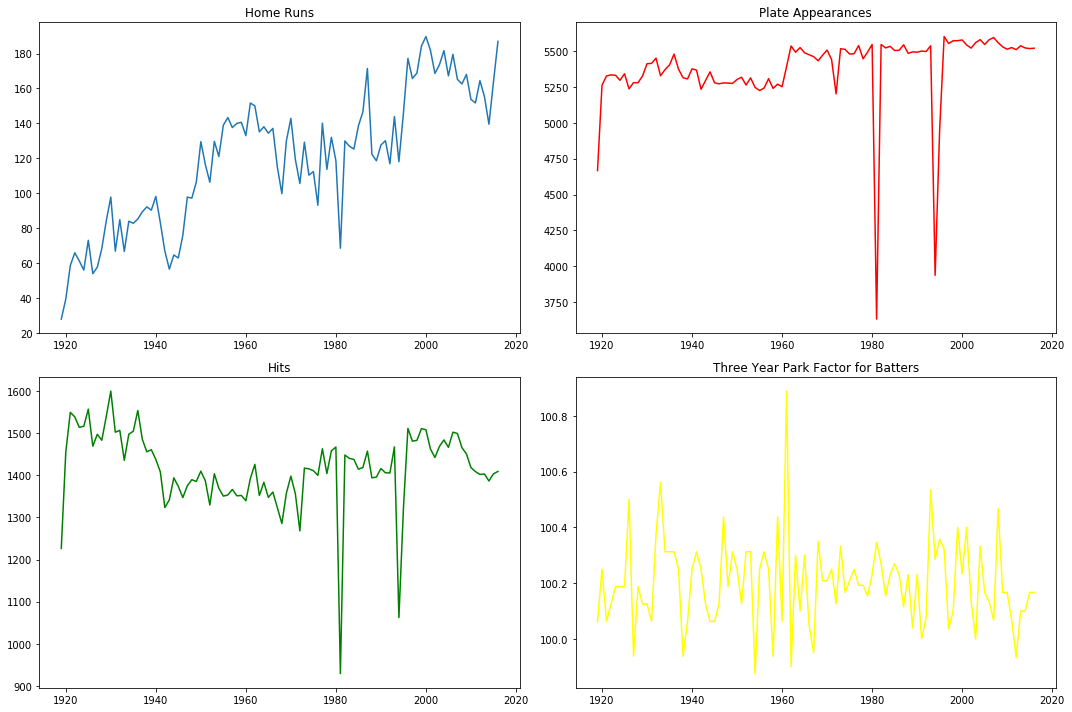

In [365]:
avgbatting=batting.groupby('yearID').mean()
avgbatting=pd.DataFrame(avgbatting)

f, axarr=plt.subplots(2,2, figsize=(15,10))
axarr[0,0].plot(avgbatting['HR'])
axarr[0,0].set_title('Home Runs')
axarr[0,1].plot(avgbatting['AB'], color='red')
axarr[0,1].set_title('Plate Appearances')
axarr[1,0].plot(avgbatting['H'], color='green')
axarr[1,0].set_title('Hits')
axarr[1,1].plot(avgbatting['BPF'], color='yellow')
axarr[1,1].set_title('Three Year Park Factor for Batters')


f.tight_layout()

In [299]:
These subplots take aggregate the team average for each year, showing a consistent trend that home runs have been increasing 
at a steady rate.This can be caused by several different factors, but is most likely due to improvement in talent, mechanics, 
strength and conditioning. 
Plate appearances could be a reason, but this average has been steady since MLB increased the season to 140 games in 1919,
154 games in 1920 and 162 games in 1961. 
One could argue that pitchers have become significantly worse over time, but Hits have been stedily around 1400 following 1940. 
Three Year Park Factor for Batters measures how favorable the ball park is to hitters, with values greater than 100 indicating
parks that are favorable to batters. While this average is very volatile in the early days of baseball, the dimensions
of the field became standardized in 1919, which resulted in less variability from park to park. 
The major dips in both home runs and plate appearances following 1961 are due to lockout seasons that resulted in 
canceled games during the 1981, 1994, and 1995 seasons.

SyntaxError: invalid syntax (<ipython-input-299-f5f380a8e7a4>, line 1)

In [300]:
batting=batting[batting['yearID']>=]
#Consolidating my data to 2000 since that would include the there is no record of HPB or Sacrifice fly until that time
batting['HR'].mean()

SyntaxError: invalid syntax (<ipython-input-300-aeeb22e9b5e9>, line 1)

In [327]:
batting=pd.DataFrame(batting)
win_percentage = batting['W']/batting['G']
batting['Win Percentage'] = win_percentage
#Win percentage is a function of wins/ games played.

strikeouts_per_walks= batting['SOA']/batting['BBA']
batting['K/BB']= strikeouts_per_walks
#Strike outs per walks provides the ratio of the other outcomes that do not result in a hit. 
whip=(batting['BBA']+batting['HA'])/(batting['G']*9)
batting['WHIP']=whip


battingavg= batting['H']/batting['AB']
batting['Batting Avg']=battingavg
#batting average is the mean of how often a team can product a hit given a certain amount of at bats.



obp= (batting['H']+batting['BB']+batting['HBP'])/(batting['HBP']+batting['AB']+batting['HBP']+batting['SF'])
batting['OBP']= obp
#On base percentage provides a ratio for how frequently a team reaches base, with exclusion of intentional base on balls. 

singles=batting['H']-batting['HR']-batting['3B']-batting['2B']
totalbases= singles+(2*batting['2B'])+(3*batting['3B'])+(4*batting['HR'])
slg=totalbases/batting['AB']
batting['SLG']=slg

batting['SLG+OPS']=batting['SLG']+batting['OBP']

walkpercentage= batting['BB']/batting['AB']
batting['Walk %']=walkpercentage

kpercentage=batting['SO']/batting['AB']
batting['SO%']=kpercentage
wOBA=(.690*batting['BB']+.722*batting['HBP']+.888*singles+1.271*batting['2B']+1.616*batting['3B']+2.101*batting['HR'])/(batting['AB']+batting['BB']+batting['SF']+batting['HBP'])
batting['wOBA']=wOBA

#wOBA is most accurate measure of offensive production because it weighs walks, singles, doubles, triples, and homerun's differently
batting.set_index('yearID').head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,Win Percentage,K/BB,Batting Avg,OBP,SLG,SLG+OPS,Walk %,SO%,wOBA,WHIP
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,0.645161,0.547619,0.310496,NaN,0.422012,NaN,0.043732,0.013848,NaN,1.465950
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,0.678571,0.785714,0.270067,NaN,0.373746,NaN,0.050167,0.018395,NaN,1.333333
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,0.344828,0.641509,0.276560,NaN,0.391231,NaN,0.021922,0.021079,NaN,1.528736
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,0.368421,0.809524,0.238606,NaN,0.293566,NaN,0.044236,0.012064,NaN,1.649123
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,0.484848,0.523810,0.287037,NaN,0.349715,NaN,0.023504,0.010684,NaN,1.397306


In [302]:
Ive added several variables to the initial data to include sabermetrics fields that use common stats and form averages that are
more representative of how certain aspects of offense impact the game. . 

SyntaxError: invalid syntax (<ipython-input-302-8dfa38a99397>, line 1)

In [357]:
batting=batting[batting['yearID']>=1919]

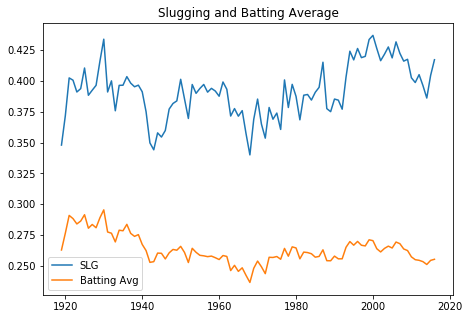

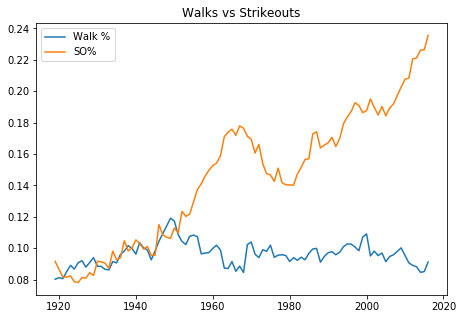

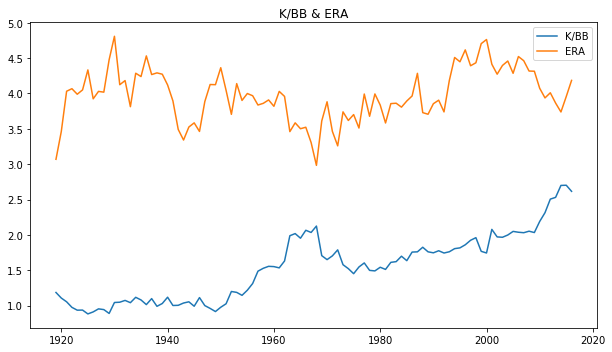

In [374]:
avgbatting=batting.groupby('yearID').mean()
avgbatting=pd.DataFrame(avgbatting)

plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(avgbatting['SLG'])
plt.plot(avgbatting['Batting Avg'])
plt.title('Slugging and Batting Average')
plt.legend()

plt.figure(figsize=(25,5))
plt.subplot(1,3,2)
plt.plot(avgbatting['Walk %'])
plt.plot(avgbatting['SO%'])
plt.title('Walks vs Strikeouts')
plt.legend()

plt.figure(figsize=(25,5))
plt.subplot(1,3,3)
plt.plot(avgbatting['K/BB'])
plt.plot(avgbatting['ERA'])
plt.title('K/BB & ERA')
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
These four graphs display how baseball has progressed as players and teams have improved. 

The first graph compares slugging to batting average, and show that while batting batting average has declined over time,
sluggin has actually increased. This indicates that batters have actually become more aggresive at the plate, sacrificing 
consistency for power.

The second graph compares walks to strike outs, and shows a clear inverse relationshp between the two. Walks have been in
decline, while strikeouts have been consistently increasing. This fits the narrative that batters have become more aggresive. It
is a fundamental understanding within baseball that hitting power increases strike outs because batters are more willing
to swing at dificult pitches to hit in an attempt to hit the ball harder.

The third graph compares teh ratio of strikeouts/walks to earned run average. This graph shows that K/BB agrees with my 
second graph, but the more interesting plot is ERA. ERA almost perfectly mimics SLG, rising/declining in unison. This shows
the true value in power hitting, because hitting for more bases results in more earned runs.




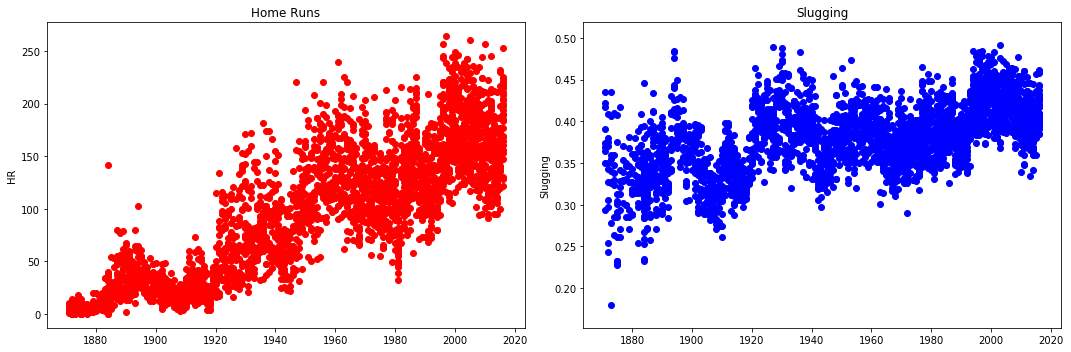

In [251]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(batting['yearID'],batting['HR'], color='red')
plt.ylabel('HR')
plt.title('Home Runs')

plt.subplot(1,2,2)
plt.scatter(batting['yearID'],batting['SLG'], color='blue')
plt.ylabel('Slugging')
plt.title('Slugging')

plt.tight_layout()
plt.show()
#Similar to home run's,slugging has also been steadily increasing
#Slugging is an indicator of power hitting, counting total bases (single=1, double=2, triple=3, homerun=4) divided by at bats. 
#An increase in slugging would be most easily driven by an increase in run's


In [ ]:
postszn  = np.where((batting['DivWin']=='Y') |
                     (batting['WCWin']=='Y') | 
                     (batting['LgWin']=='Y') | 
                     (batting['WSWin']=='Y'), 'Y', 'N')

In [ ]:
batting['postseason']= postszn

In [ ]:
homerun_mean= batting['HR']-(batting['HR'].mean())

batting['HR avg'] = homerun_mean
batting.head()

In [200]:
batting['HR'].std()

61.854748871394435

In [201]:
batting['HR'].describe()

count    2835.000000
mean      102.045150
std        61.854749
min         0.000000
25%        42.000000
50%       108.000000
75%       150.000000
max       264.000000
Name: HR, dtype: float64

In [202]:
batting['W'].describe()
#on average, most team

count    2835.000000
mean       74.814109
std        17.591208
min         0.000000
25%        66.000000
50%        77.000000
75%        87.000000
max       116.000000
Name: W, dtype: float64

In [203]:
batting.set_index('yearID')
batting.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,42,23,225,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,28,22,218,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,53,34,223,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,21,17,163,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,42,22,227,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88


In [204]:
postbatting = batting[batting['postseason']=='Y']
postbatting=postbatting.set_index(postbatting['yearID'])
postbatting.head()

KeyError: 'postseason'

In [205]:
postbatting.set_index('yearID').head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,K/BB,Batting Avg,OBP,SLG,SLG+OPS,Walk %,SO%,wOBA,postseason,HR avg
yearID,,,,,,,,,,,,,,,,,,,,,
2000,NL,ATL,ATL,E,1,162,81.0,95,67,Y,...,2.258264,0.271452,0.379335,0.428676,0.808010,0.108399,0.184004,0.342157,Y,11.131373
2000,AL,CHA,CHW,C,1,162,81.0,95,67,Y,...,1.688925,0.286043,0.388612,0.470067,0.858679,0.104676,0.170032,0.360681,Y,48.131373
2000,AL,NYA,NYY,E,1,161,80.0,87,74,Y,...,1.802426,0.277358,0.389685,0.449964,0.839649,0.113571,0.181246,0.353419,Y,37.131373
2000,NL,NYN,NYM,E,2,162,81.0,94,68,N,...,2.027875,0.263398,0.384752,0.430186,0.814938,0.123040,0.189027,0.342617,Y,30.131373
2000,AL,OAK,OAK,W,1,161,81.0,91,70,Y,...,1.565854,0.269964,0.403469,0.457734,0.861203,0.134892,0.208453,0.359383,Y,71.131373


In [206]:
avgs=batting.groupby('yearID').mean()
avgs.head()

,Rank,G,Ghome,W,L,R,AB,H,2B,3B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
yearID,,,,,,,,,,,,,,,,,,,,,
1871,5.000000,28.222222,NaN,13.888889,13.888889,295.444444,1202.444444,344.555556,48.222222,26.555556,...,344.555556,5.222222,43.666667,19.444444,209.444444,NaN,0.831556,NaN,98.666667,98.888889
1872,6.000000,33.272727,NaN,16.181818,16.181818,308.181818,1428.454545,407.181818,52.909091,13.454545,...,407.181818,3.181818,22.363636,0.000000,244.272727,NaN,0.825273,NaN,102.363636,104.909091
1873,5.000000,44.222222,NaN,21.888889,21.888889,397.777778,1886.111111,547.000000,68.111111,25.333333,...,547.000000,5.666667,35.666667,26.666667,336.111111,NaN,0.824111,NaN,96.777778,100.222222
1874,4.500000,58.000000,NaN,28.875000,28.875000,433.625000,2384.500000,654.375000,84.375000,24.625000,...,654.375000,5.250000,29.750000,0.000000,451.375000,NaN,0.827125,NaN,102.125000,101.500000
1875,6.846154,53.076923,NaN,25.769231,25.769231,325.692308,2058.307692,523.000000,64.076923,21.769231,...,523.000000,3.230769,20.153846,0.000000,356.307692,NaN,0.839308,NaN,97.538462,99.615385


In [207]:
postavgs= postbatting.groupby(postbatting['yearID']).mean()
postavgs.head()

,Rank,G,Ghome,W,L,R,AB,H,2B,3B,...,Win Percentage,K/BB,Batting Avg,OBP,SLG,SLG+OPS,Walk %,SO%,wOBA,HR avg
yearID,,,,,,,,,,,,,,,,,,,,,
2000,1.25,161.750,80.875,93.125,68.625,891.500,5528.875,1511.125,289.750,27.750,...,0.575699,1.807473,0.273265,0.393744,0.450701,0.844445,0.122156,0.192960,0.354162,44.131373
2001,1.25,161.875,80.875,96.250,65.500,840.000,5562.625,1506.000,295.125,29.625,...,0.594591,2.414595,0.270671,0.372123,0.440359,0.812483,0.101973,0.189287,0.343902,28.631373
2002,1.25,161.625,80.875,98.750,62.625,801.625,5553.000,1493.750,302.750,29.375,...,0.610996,2.252038,0.268936,0.370890,0.431888,0.802778,0.102321,0.180256,0.340177,13.256373
2003,1.25,162.000,81.125,95.250,66.625,818.000,5582.625,1511.000,313.250,31.375,...,0.587964,2.235444,0.270472,0.371039,0.441225,0.812264,0.101119,0.178309,0.343445,25.006373
2004,1.25,162.000,81.000,96.125,65.875,835.500,5585.000,1518.500,297.375,29.125,...,0.593364,2.330998,0.271818,0.373415,0.442867,0.816281,0.101952,0.188641,0.345360,32.006373


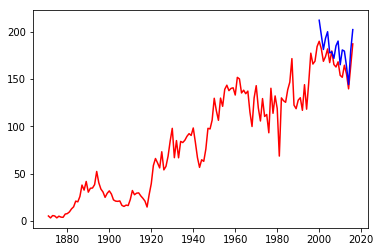

In [208]:
plt.plot(avgs['HR'], color='red')
plt.plot(postavgs['HR'], color='blue')
plt.show()
#Team's that have post saeson success hit more home run's on avg, but


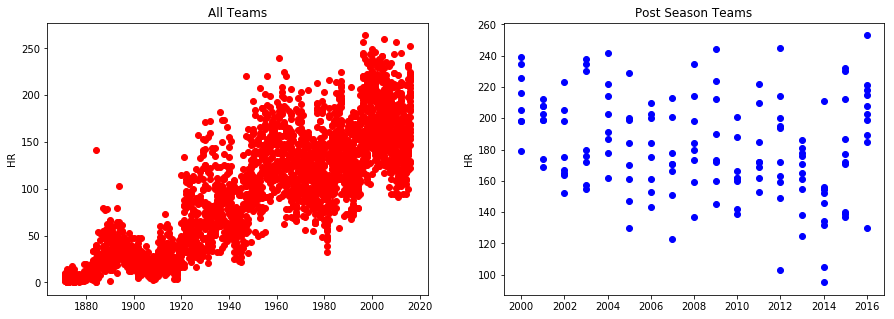

In [209]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(batting['yearID'] ,batting['HR'], color='red')
plt.ylabel('HR')
plt.title('All Teams')

plt.subplot(1,2,2)
plt.scatter(postbatting['yearID'],postbatting['HR'], color='blue')
plt.ylabel('HR')
plt.title('Post Season Teams')

plt.show()

In [210]:
batting['HR'].mean()

102.04514991181658

In [211]:
postbatting['HR'].mean()

181.75342465753425

In [212]:
postbatting['Rank'].mean()

1.3150684931506849

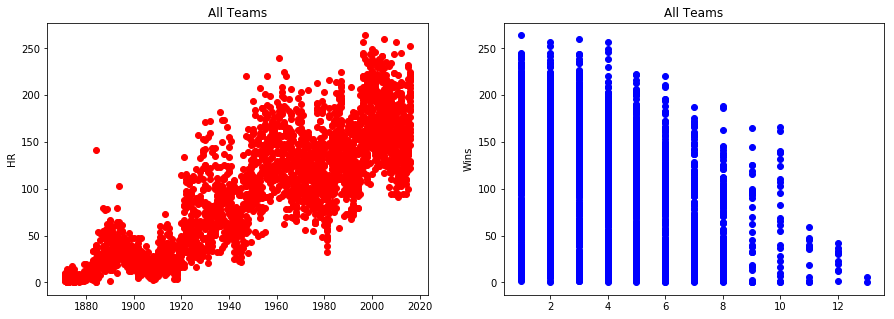

In [213]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(batting['yearID'] ,batting['HR'], color='red')
plt.ylabel('HR')
plt.title('All Teams')

plt.subplot(1,2,2)
plt.scatter(batting['Rank'] ,batting['HR'], color='blue')
plt.ylabel('Wins')
plt.title('All Teams')

plt.show()
#Teams with a lower rank clearly hit less homerun's


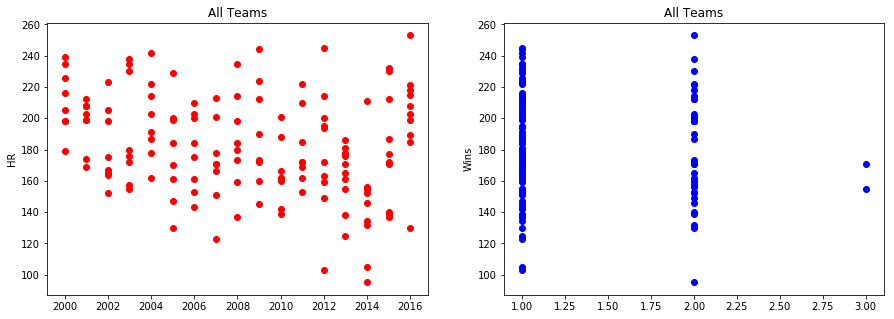

In [214]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(postbatting['yearID'] ,postbatting['HR'], color='red')
plt.ylabel('HR')
plt.title('All Teams')

plt.subplot(1,2,2)
plt.scatter(postbatting['Rank'] ,postbatting['HR'], color='blue')
plt.ylabel('Wins')
plt.title('All Teams')

plt.show()
#Teams with a lower rank clearly hit less homerun's


In [215]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

X = batting['HR']
Y = batting['Win Percentage']

model = sm.OLS(X,Y)
results = model.fit()
print(results.summary())

C:\Users\ECABREJA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


KeyError: 'Win Percentage'

In [ ]:
x=batting['SLG']
y=batting['Win Percentage']

def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return print (results.sumary())

In [ ]:


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(batting['HR'] ,batting['Win Percentage'], color='red')
plt.ylabel('Win Percentage')
plt.xlabel('Numer of HRs')
plt.title('All Teams')


plt.show()
#Teams with a lower rank clearly hit less homerun's


In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(batting['wOBA'] ,batting['Win Percentage'], color='red')
plt.ylabel('Win Percentage')
plt.xlabel('wOBA')
plt.title('All Teams')


plt.show()
#Teams with a lower rank clearly hit less homerun's


In [ ]:
batting.groupby('yearID').mean()



In [ ]:
plt.figure(figsize=(15,5))

plt.plot(batting['HR'])

In [ ]:
batting.boxplot(column='HR')

In [ ]:
he second data set is called Salaries and will be referred to as salaries in our study. Payroll contains the salary 
information for each player dating back to 1985.

In [ ]:
pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Salaries.csv')
salaries=pd.read_csv('C:\\Users\ECABREJA\Desktop\Thinkful\Salaries.csv')
salaries=salaries[salaries['yearID']>=2000]
salaries.head()

In [244]:
for b in banes:
    batting['yearID']==salaries['yearID'] & batting['teamID']==salaries['teamID']
    return salaries.sum()

SyntaxError: 'return' outside function (<ipython-input-244-99c2eff7cfae>, line 3)

In [238]:
payroll=salaries.groupby(['yearID','teamID']).sum()['Salary']
payroll=pd.DataFrame(payroll)
payroll.head()

Salary
yearID teamID          
2000   ANA     51464167
       ARI     81027833
       ATL     84537836
       BAL     81447435
       BOS     77940333

In [227]:
mapp=dict((i,j) for i,j in payroll.iteritems())
mapp[(2000, 'ATL')]

84537836

KeyError: ('yearID', 'teamID')